In [38]:
import pandas as pd
import seaborn as sns
import scipy
df=pd.read_csv("iris_ds5230.csv")

In [33]:
len(df)

149

### 1. Reviewing the structure and basic statistics of the data:

In [3]:
df.info() # to check the structure of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          142 non-null    float64
 1   3.5          146 non-null    float64
 2   1.4          143 non-null    float64
 3   0.2          139 non-null    float64
 4   Iris-setosa  137 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.describe() # to get basic statistics of the numerical columns

,5.1,3.5,1.4,0.2
count,142.000000,146.000000,143.000000,139.000000
mean,5.866901,3.052055,3.795804,1.214388
std,0.825371,0.436478,1.755028,0.751189
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Identifying missing or incorrect data: 

In [5]:
df.isna().sum() # to check the number of missing values in each column

5.1             7
3.5             3
1.4             6
0.2            10
Iris-setosa    12
dtype: int64

In [7]:
df.duplicated().sum() # to check the number of duplicate rows

2

### 3. Examining the distribution of variables:

array([[<AxesSubplot: title={'center': '5.1'}>,
        <AxesSubplot: title={'center': '3.5'}>],
       [<AxesSubplot: title={'center': '1.4'}>,
        <AxesSubplot: title={'center': '0.2'}>]], dtype=object)

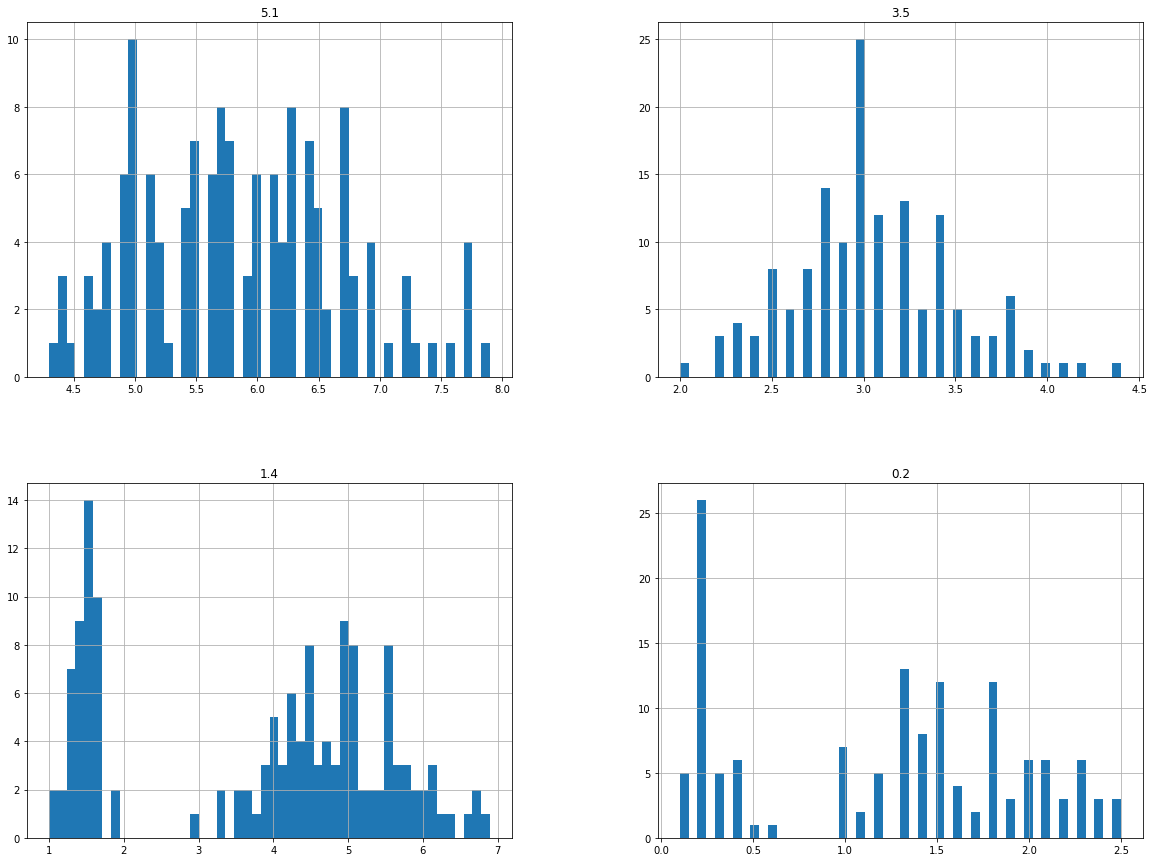

In [8]:
df.hist(bins=50, figsize=(20,15)) # to plot histograms of all numerical columns

<AxesSubplot: >

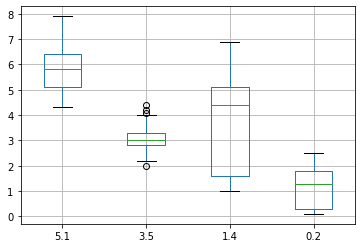

In [18]:
df.boxplot(column=['5.1', '3.5','1.4','0.2']) # to plot boxplots of specific columns

In [21]:
print(df['5.1'].value_counts()) #to check the frequency of each unique value in a column
print(df['3.5'].value_counts())
print(df['1.4'].value_counts())
print(df['0.2'].value_counts())

5.0    10
6.7     8
6.3     8
5.7     8
5.5     7
5.8     7
6.4     7
4.9     6
5.6     6
6.1     6
6.0     6
5.1     6
6.5     5
5.4     5
5.2     4
6.9     4
4.8     4
7.7     4
6.2     4
4.4     3
5.9     3
4.6     3
6.8     3
7.2     3
4.7     2
6.6     2
7.3     1
7.4     1
4.5     1
7.6     1
7.1     1
5.3     1
4.3     1
7.9     1
Name: 5.1, dtype: int64
3.0    25
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.5     8
2.7     8
3.8     6
3.5     5
3.3     5
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: 3.5, dtype: int64
1.5    14
1.4     9
4.5     8
5.1     8
1.6     7
1.3     7
5.6     5
4.0     5
4.9     5
5.0     4
4.7     4
4.4     4
4.2     4
5.8     3
6.1     3
5.5     3
5.7     3
4.1     3
4.8     3
1.7     3
3.9     3
4.6     3
6.0     2
5.3     2
1.2     2
3.5     2
1.9     2
5.9     2
5.2     2
6.7     2
5.4     2
3.3     2
4.3     2
6.4     1
6.9     1
1.1     1
3.6     1
1.0     1
6.

### 4.Creating visualizations to help understand patterns in the data:

/var/folders/ty/xbpftz4s7xv_57lbgtmgflxw0000gn/T/ipykernel_26278/3070347701.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) # to create a heatmap of correlation between variables


<AxesSubplot: >

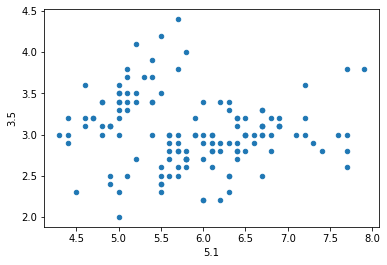

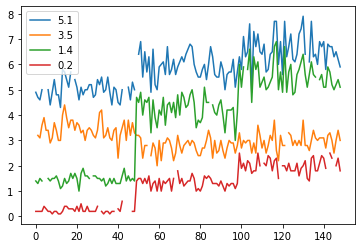

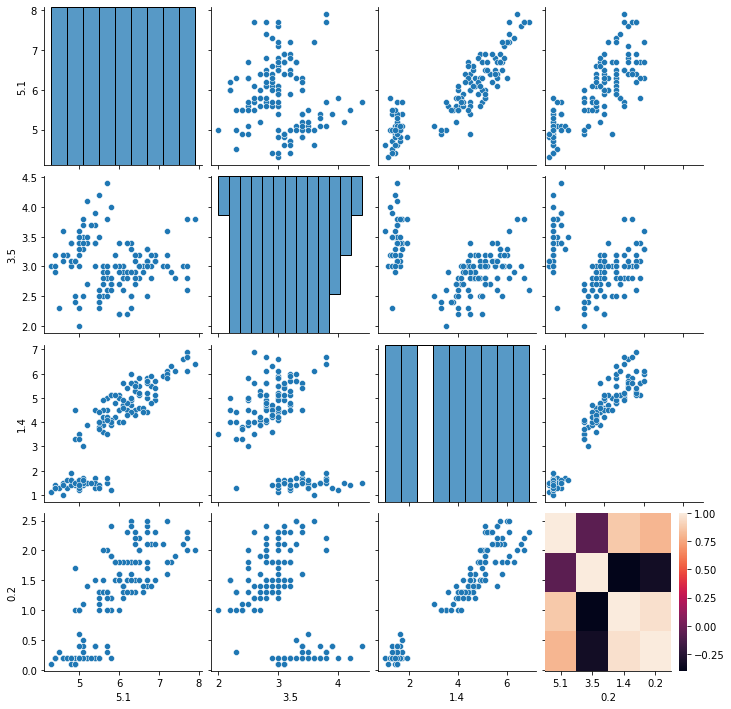

In [26]:
df.plot(kind='scatter', x='5.1', y='3.5') # scatter plot
df.plot(kind='line') # line plot
sns.pairplot(df) # to plot pairwise relationships
sns.heatmap(df.corr()) # to create a heatmap of correlation between variables

### 5. Identifying potential outliers or anomalies in the data:

In [34]:
df.loc[(df['1.4'] > 6.5) | (df['1.4'] < 1.5)] # to identify rows with values outside a certain range

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,NaN,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
11,4.8,3.0,1.4,0.1,Iris-setosa
12,4.3,3.0,1.1,0.1,Iris-setosa
13,5.8,4.0,1.2,0.2,Iris-setosa
15,5.4,3.9,1.3,0.4,Iris-setosa
16,5.1,3.5,1.4,0.3,NaN
21,4.6,3.6,1.0,0.2,NaN


### 6.Checking for correlation between variables:

In [36]:
df.corr() # to get the correlation matrix of numerical columns

/var/folders/ty/xbpftz4s7xv_57lbgtmgflxw0000gn/T/ipykernel_26278/2277408958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # to get the correlation matrix of numerical columns


,5.1,3.5,1.4,0.2
5.1,1.000000,-0.074169,0.869591,0.803561
3.5,-0.074169,1.000000,-0.403038,-0.333265
1.4,0.869591,-0.403038,1.000000,0.958755
0.2,0.803561,-0.333265,0.958755,1.000000
